# 数据分析与实践 实验三

 崔士强 PB22151743

## 任务一

In [1]:
import pandas as pd

### Q1

In [2]:
df = pd.read_csv('data.csv', encoding='utf-8')

### Q2

In [3]:
print(df.head(10))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

### Q3

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          568 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   567 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               567 non-null    float64
 14  perimeter_se             5

### Q4

In [5]:
df = df.dropna()

### Q5

In [6]:
df = df.reset_index(drop=True)

### Q6

In [7]:
df = df.drop(columns='id')

### Q7

In [8]:
print(df['diagnosis'].value_counts())

diagnosis
B    355
M    205
Name: count, dtype: int64


### Q8

In [9]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: 0 if x == 'B' else 1)

### Q9

In [10]:
print(df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']].describe())

       radius_mean  texture_mean  perimeter_mean    area_mean  smoothness_mean
count   560.000000    560.000000      560.000000   560.000000       560.000000
mean     14.074302     19.271750       91.595857   649.643929         0.096281
std       3.491064      4.319015       24.048329   347.451287         0.014088
min       6.981000      9.710000       43.790000   143.500000         0.052630
25%      11.677500     16.157500       74.967500   418.325000         0.086290
50%      13.275000     18.825000       85.980000   544.050000         0.095785
75%      15.750000     21.802500      103.725000   775.775000         0.105100
max      28.110000     39.280000      188.500000  2501.000000         0.163400


### Q10

In [11]:
print(df.groupby('diagnosis').apply(lambda x: x.std() / x.mean()))

           diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
diagnosis                                                                    
0                NaN     0.146810      0.223512        0.151502   0.290776   
1                0.0     0.182084      0.175314        0.187713   0.373423   

           smoothness_mean  compactness_mean  concavity_mean  \
diagnosis                                                      
0                 0.145493          0.421460        0.943919   
1                 0.124034          0.370451        0.467383   

           concave points_mean  symmetry_mean  ...  radius_worst  \
diagnosis                                      ...                 
0                     0.619809       0.142692  ...      0.148098   
1                     0.387497       0.143382  ...      0.200238   

           texture_worst  perimeter_worst  area_worst  smoothness_worst  \
diagnosis                                                                 
0      

## 任务二

In [12]:
import numpy as np
import matplotlib.pyplot as plt

### Q1

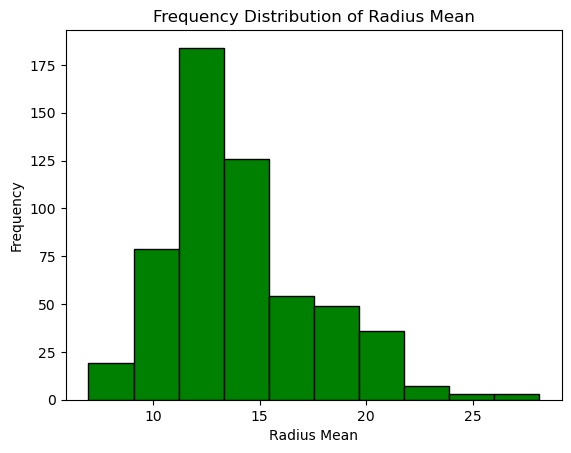

In [13]:
plt.hist(df['radius_mean'], bins=10, color='green', edgecolor='black')

# Add title and labels
plt.title('Frequency Distribution of Radius Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')

plt.show()

### Q2

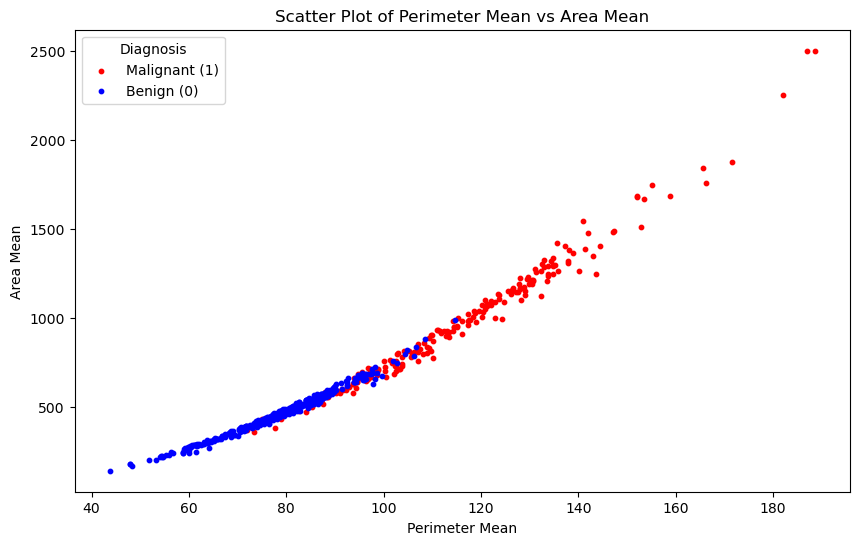

In [14]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df[df['diagnosis'] == 1]['perimeter_mean'], df[df['diagnosis'] == 1]['area_mean'], color='red', s=10, label='Malignant (1)')
plt.scatter(df[df['diagnosis'] == 0]['perimeter_mean'], df[df['diagnosis'] == 0]['area_mean'], color='blue', s=10, label='Benign (0)')

# Add title and labels
plt.title('Scatter Plot of Perimeter Mean vs Area Mean')
plt.xlabel('Perimeter Mean')
plt.ylabel('Area Mean')
plt.legend(title='Diagnosis')

# Display the plot
plt.show()

### Q3

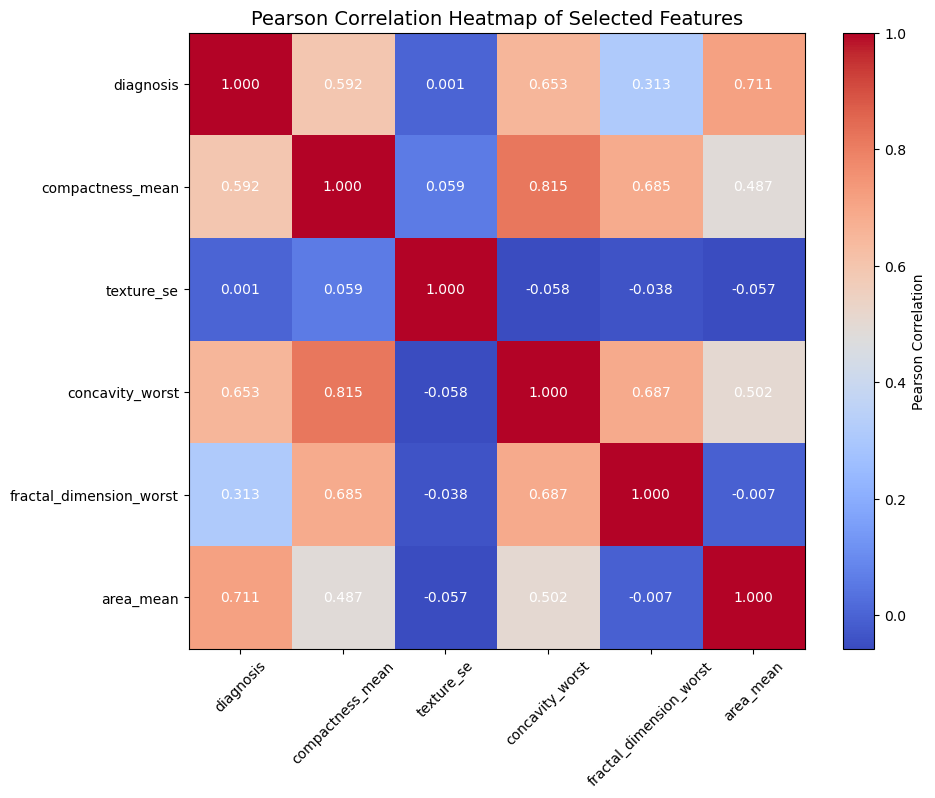

In [15]:
data_list = ['diagnosis', 'compactness_mean', 'texture_se', 'concavity_worst', 'fractal_dimension_worst', 'area_mean']
data = df[data_list]

# Pearson correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))

plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Pearson Correlation')

plt.title('Pearson Correlation Heatmap of Selected Features', fontsize=14)
plt.xticks(ticks=np.arange(len(data_list)), labels=data_list, rotation=45)
plt.yticks(ticks=np.arange(len(data_list)), labels=data_list)

for i in range(len(data_list)):
    for j in range(len(data_list)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.3f}', ha='center', va='center', color='white')

plt.show()

## 任务三

In [16]:
x = df['radius_mean']
y = df['area_mean']

### Q1

In [17]:
X = np.vstack([np.ones(len(x)), x, x**2]).T
w = np.linalg.inv(X.T @ X) @ X.T @ y
print(w)

[-4.70867951 -0.44260792  3.14186228]


### Q2

In [18]:
coeffs = np.polyfit(x, y, 2)
print(coeffs)

[ 3.14186228 -0.44260792 -4.70867951]


### Q3

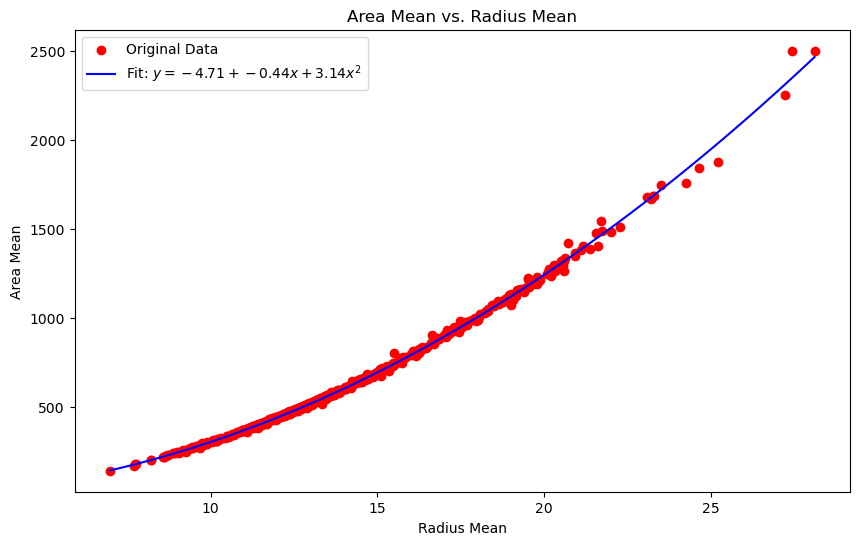

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label='Original Data')  # Original data
xp = np.linspace(min(x), max(x), 100)
yp = np.polyval(coeffs, xp)
plt.plot(xp, yp, color='blue', label='Fit: $y = {:.2f} + {:.2f}x + {:.2f}x^2$'.format(coeffs[2], coeffs[1], coeffs[0]))  # Fitted curve
plt.title('Area Mean vs. Radius Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Area Mean')
plt.legend()
plt.show()

## 任务四

In [20]:
X = df[["perimeter_mean", "radius_mean"]].to_numpy()

### Q1

In [21]:
corX = np.cov(X, rowvar=False)
print(corX)
eigV, eigMat = np.linalg.eig(corX)
print(eigV)
print(eigMat)

# Verify orthogonality of eigenvectors
orthogonality_check = np.allclose(np.eye(2), eigMat.T @ eigMat)
print(orthogonality_check)

[[578.32210982  83.77072122]
 [ 83.77072122  12.18753099]]
[5.90457503e+02 5.21373729e-02]
[[ 0.98966947 -0.14336785]
 [ 0.14336785  0.98966947]]
True


### Q2

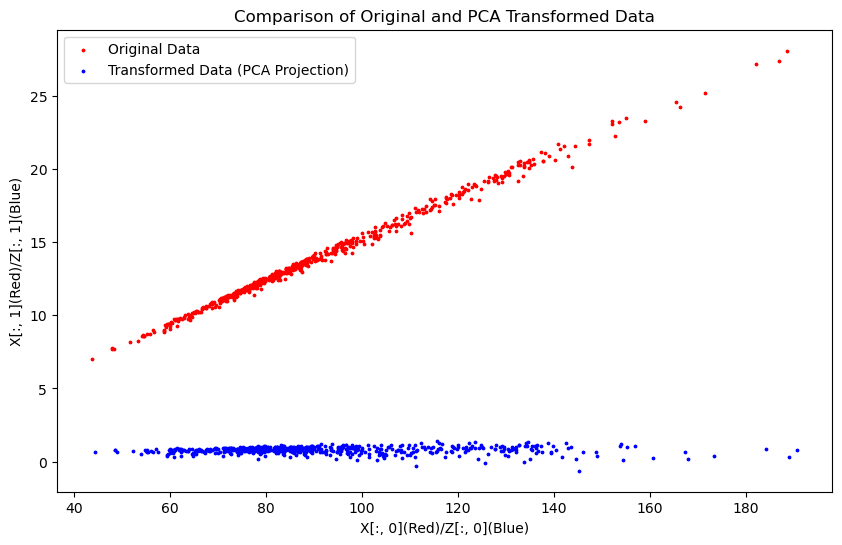

In [22]:
Z = X @ eigMat
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], color='red', s=3, label='Original Data')
plt.scatter(Z[:, 0], Z[:, 1], color='blue', s=3, label='Transformed Data (PCA Projection)')
plt.title('Comparison of Original and PCA Transformed Data')
plt.xlabel('X[:, 0](Red)/Z[:, 0](Blue)')
plt.ylabel('X[:, 1](Red)/Z[:, 1](Blue)')
plt.legend()
plt.show()

### Q3

In [23]:
corZ = np.cov(Z, rowvar=False)
print(corZ)
# Keep only the first principal component
Z_reduced = Z[:, 0]

[[ 5.90457503e+02 -4.51429790e-14]
 [-4.51429790e-14  5.21373729e-02]]


## 任务五

In [24]:
from scipy.stats import ttest_ind
malignant = df[df['diagnosis'] == 1]['concavity_worst']
benign = df[df['diagnosis'] == 0]['concavity_worst']

### Q1

### Q2

In [25]:
print("Malignant Mean:", malignant.mean())
print("Benign Mean:", benign.mean())

Malignant Mean: 0.44671356097560977
Benign Mean: 0.1663615971830986


### Q3

In [26]:
t_stat, p_val = ttest_ind(malignant, benign, alternative='greater')
print("T-Statistic:", t_stat)
print("P-Value:", p_val)

T-Statistic: 20.346631967479436
P-Value: 1.4640846763013996e-69
